In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [2]:
pip install nltk

     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 268.0/268.0 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
df = pd.read_csv('clean_BA_reviews.csv')

In [19]:
df.head()

,Unnamed: 0,review_title,name,date,rating,verification,text_review
0,0,"""Zero empathy was shown""",B McIver,21st July 2023,5,Trip Verified,A simple story with an unfortunate outcome th...
1,1,"""pilot apologise at every step of the way""",D Keane,21st July 2023,1,Trip Verified,Flight was delayed due to the inbound flight...
2,2,"""crew were always ready to top up drinks""",Alan Lacey,20th July 2023,4,Not Verified,Fast and friendly check in (total contrast t...
3,3,"""The service is really mediocre""",K Malec,20th July 2023,8,Trip Verified,I don't understand why British Airways is cl...
4,4,"""made their economy experience so miserable""",Alan Lacey,20th July 2023,2,Not Verified,I'm sure that BA have gradually made their e...


In [20]:
df.shape

(3600, 7)

In [21]:
sample = df.head(500)

In [22]:
sample.head()

,Unnamed: 0,review_title,name,date,rating,verification,text_review
0,0,"""Zero empathy was shown""",B McIver,21st July 2023,5,Trip Verified,A simple story with an unfortunate outcome th...
1,1,"""pilot apologise at every step of the way""",D Keane,21st July 2023,1,Trip Verified,Flight was delayed due to the inbound flight...
2,2,"""crew were always ready to top up drinks""",Alan Lacey,20th July 2023,4,Not Verified,Fast and friendly check in (total contrast t...
3,3,"""The service is really mediocre""",K Malec,20th July 2023,8,Trip Verified,I don't understand why British Airways is cl...
4,4,"""made their economy experience so miserable""",Alan Lacey,20th July 2023,2,Not Verified,I'm sure that BA have gradually made their e...


In [23]:
sample.shape

(500, 7)

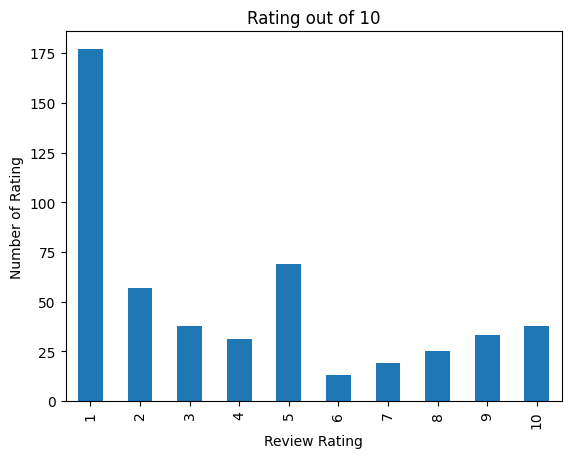

In [77]:
ax = sample['rating'].value_counts().sort_index().plot(kind='bar', title='Rating out of 10')
ax.set_xlabel('Review Rating')
ax.set_ylabel('Number of Rating')
plt.show()

In [80]:
df['rating'].mean()

4.811111111111111

In [25]:
# NLTK

example = sample['review_title'][0]
print(example)

"Zero empathy was shown"


In [28]:
tokens = nltk.word_tokenize(example)[1:-1]
tokens

['Zero', 'empathy', 'was', 'shown']

In [30]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [34]:
tagged = nltk.pos_tag(tokens)


In [36]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [38]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [39]:
entities = nltk.chunk.ne_chunk(tagged)

In [40]:
entities.pprint()

(S (GPE Zero/NNP) empathy/NN was/VBD shown/VBN)


### VADER - valence aware dictionary and sentiment reasoner

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer
#from tqdm.notebook import tqdm 

In [43]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rishabh\AppData\Roaming\nltk_data...


True

In [44]:
sia = SentimentIntensityAnalyzer()

In [52]:
sia.polarity_scores('I am very happy!')
# 'compound'  ->  it is the aggregation of all neu, pos, neg
# range is -> [-1,1]

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [55]:
example[1:-1]

'Zero empathy was shown'

In [58]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [62]:
sample.head()

,Unnamed: 0,review_title,name,date,rating,verification,text_review
0,0,"""Zero empathy was shown""",B McIver,21st July 2023,5,Trip Verified,A simple story with an unfortunate outcome th...
1,1,"""pilot apologise at every step of the way""",D Keane,21st July 2023,1,Trip Verified,Flight was delayed due to the inbound flight...
2,2,"""crew were always ready to top up drinks""",Alan Lacey,20th July 2023,4,Not Verified,Fast and friendly check in (total contrast t...
3,3,"""The service is really mediocre""",K Malec,20th July 2023,8,Trip Verified,I don't understand why British Airways is cl...
4,4,"""made their economy experience so miserable""",Alan Lacey,20th July 2023,2,Not Verified,I'm sure that BA have gradually made their e...


In [63]:
res ={}
for i ,row in enumerate(df['review_title']):
    res[i] = sia.polarity_scores(row)

In [67]:
vaders = pd.DataFrame(res).T

In [68]:
vaders.shape

(3600, 4)

In [69]:
vaders.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.729,0.271,0.3818
2,0.000,0.583,0.417,0.5106
3,0.000,1.000,0.000,0.0000
4,0.452,0.548,0.000,-0.6269


In [72]:
#result = pd.concat([df1, df3], axis=1, join='inner')
result = pd.concat([df,vaders], axis=1, join='inner')

In [73]:
result

,Unnamed: 0,review_title,name,date,rating,verification,text_review,neg,neu,pos,compound
0,0,"""Zero empathy was shown""",B McIver,21st July 2023,5,Trip Verified,A simple story with an unfortunate outcome th...,0.000,1.000,0.000,0.0000
1,1,"""pilot apologise at every step of the way""",D Keane,21st July 2023,1,Trip Verified,Flight was delayed due to the inbound flight...,0.000,0.729,0.271,0.3818
2,2,"""crew were always ready to top up drinks""",Alan Lacey,20th July 2023,4,Not Verified,Fast and friendly check in (total contrast t...,0.000,0.583,0.417,0.5106
3,3,"""The service is really mediocre""",K Malec,20th July 2023,8,Trip Verified,I don't understand why British Airways is cl...,0.000,1.000,0.000,0.0000
4,4,"""made their economy experience so miserable""",Alan Lacey,20th July 2023,2,Not Verified,I'm sure that BA have gradually made their e...,0.452,0.548,0.000,-0.6269
...,...,...,...,...,...,...,...,...,...,...,...
3595,3595,British Airways customer review,Bruce Bettridge,29th August 2012,7,NaN,Business LHR to BKK. 747-400. First try back w...,0.000,1.000,0.000,0.0000
3596,3596,British Airways customer review,J Robertson,29th August 2012,4,NaN,This was a bmi Regional operated flight on a R...,0.000,1.000,0.000,0.0000
3597,3597,British Airways customer review,W Benson,29th August 2012,1,NaN,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,0.000,1.000,0.000,0.0000
3598,3598,British Airways customer review,S Luqman,29th August 2012,4,NaN,Just got back from Bridgetown Barbados flying ...,0.000,1.000,0.000,0.0000


<AxesSubplot: xlabel='rating', ylabel='compound'>

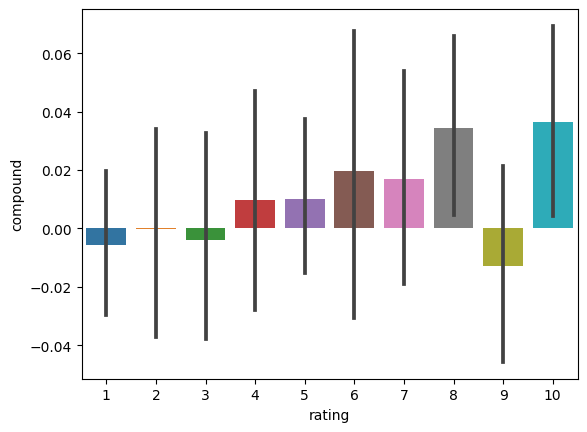

In [74]:
sns.barplot(data=result, x='rating', y='compound')

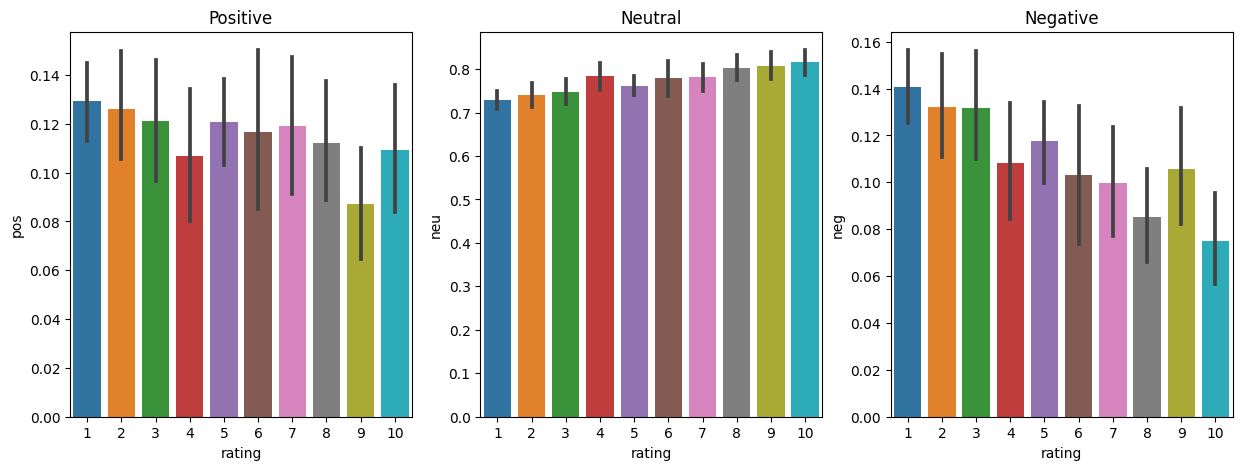

In [76]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=result, x='rating',y='pos', ax = axs[0])
sns.barplot(data=result, x='rating',y='neu', ax = axs[1])
sns.barplot(data=result, x='rating',y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()